# Dynamic Programming

## 1D DP

In [ ]:
# Fibonacci sequence

def fibonacci(n,dp):
    if n<=1:
        return n
    if dp[n]!=-1:
        return dp[n]
    dp[n]=fibonacci(n-1,dp)+fibonacci(n-2,dp)
    return dp[n]
fibonacci(12,[-1]*13)

In [ ]:
# Frog jumps 1 or 2 steps. Find the min cost to reach the top. Cost is abs diff of heights of the steps
class Solution:
    def minCost(self, height):
        n=len(height)
        # code here
        dp=[-1]*n
        dp[0]=0
        if n>=2:
            dp[1]=abs(height[1]-height[0])
        for i in range(2,n):
            jump1=dp[i-1]+abs(height[i]-height[i-1])
            jump2=dp[i-2]+abs(height[i]-height[i-2])
            dp[i]=min(jump1,jump2)
        return dp[n-1]
    
# Frog can jump from ith step to i+1,i+2,...i+k steps. Find the min cost to reach the top. Cost is abs diff of heights of the steps
class Solution:
    def minimizeCost(self, k, arr):
        # code here
        n=len(arr)
        dp=[-1]*n
        dp[0]=0
        if n>=2:
            dp[1]=abs(arr[1]-arr[0])
        for i in range(2,n):
            min_cost=float('inf')
            for j in range(1,k+1):
                if i-j>=0:  # as if i<j it can cause negative indices in arr
                    min_cost=min(min_cost,dp[i-j]+abs(arr[i]-arr[i-j]))
            dp[i]=min_cost
        return dp[n-1]

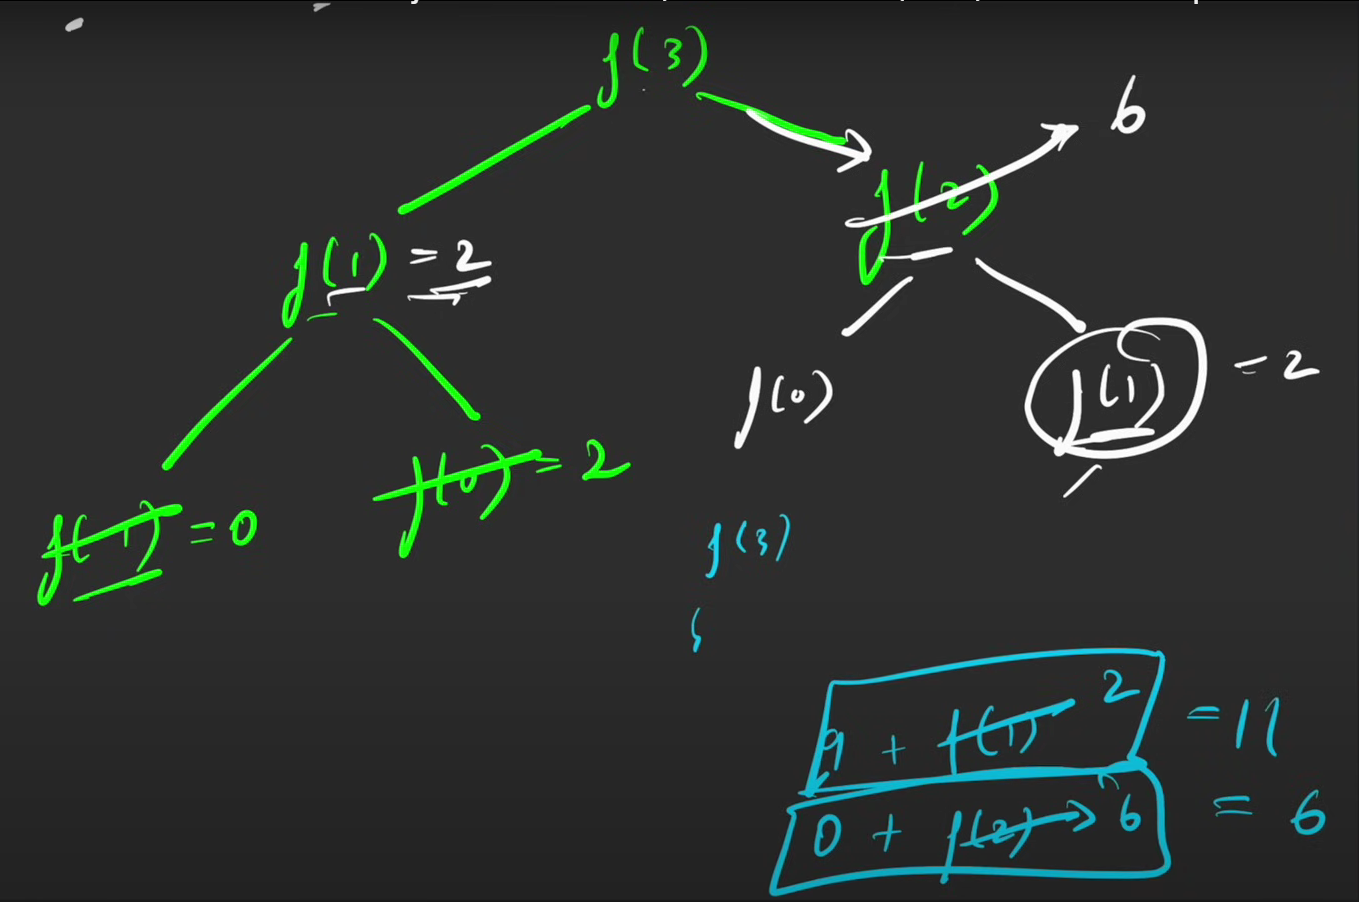

In [ ]:
# House Robber-I
# TC:O(N) SC:O(N)
# Generate all possible subsequeneces containing non-adjacent elements and return the one with max sum
# here dp[i] signifies the max sum of non-adjacent element subsequence ending at ith index

# Recursive
def generate(arr,index,dp):
    if index==0:
        return arr[index]
    if index<0:
        return 0
    if dp[index]!=-1:
        return dp[index]
    # choose
    choose=arr[index]+generate(arr,index-2,dp)
    # not choose
    not_choose=generate(arr,index-1,dp)
    dp[index]=max(choose,not_choose)
    return dp[index]
generate([2,7,9,3,1],4,[-1]*5)

#Iterative
def rob(arr):
    n=len(arr)
    dp=[0]*n
    dp[0]=arr[0]
    for i in range(1,n):
        take=arr[i]
        if i>=2:# to avoid negative indices
            take+=dp[i-2]
        non_take=dp[i-1]
        dp[i]=max(take,non_take)
    return dp[n-1]
rob([2,7,9,3,1])

In [ ]:
# House Robber-II - circular street with houses. First and last house are adjacent.
# TC:O(N) SC:O(N)
class Solution:
    def rob(self, nums) -> int:
        def robber(arr,ind,dp):
            if ind>=len(arr):
                return 0
            if dp[ind]!=-1:
                return dp[ind]
            take=arr[ind]+robber(arr,ind+2,dp)
            non_take=robber(arr,ind+1,dp)
            dp[ind]=max(take,non_take)
            return dp[ind]
        if len(nums)==1:
            return nums[0]
        return max(robber(nums[:-1],0,[-1]*(len(nums)-1)),robber(nums[1:],0,[-1]*(len(nums)-1)))

In [ ]:
# Integer Replacement
# Convert a number to 1 in min possible steps
# If n is even, replace n with n/2, if n is odd, replace n with either n+1 or n-1
def integerReplacement(self, n: int) -> int:
    def replace(n,dp):
        # if 1
        if n==1:
            return 0
        if n in dp:
            return dp[n]
        t1,t2,t3=float('inf'),float('inf'),float('inf')
        if n%2==0:
            t1=1+replace(n//2,dp)
        else:
            t2=1+replace(n-1,dp)
            t3=1+replace(n+1,dp)
        res=min(t1,t2,t3)
        dp[n]=res
        return res
    return replace(n,{})   # use of dictionary to store only those results which are computed and not waste memory

## 2D DP

In [ ]:
# Ninja Training
# A ninja has to train everyday but cant repeat the same task on consecutive days. Find max sum of points he earns by doing tasks.
# he trains for N days and has 3 tasks for each day

def ninjaTraining(n: int, points: List[List[int]]) -> int:

    def ninja(points,prev,index,dp):
        if index==len(points)-1:
            maxi=0
            for i in range(3):
                if i!=prev:
                    maxi=max(maxi,points[index][i])
            return maxi
        if dp[index][prev]!=-1:
            return dp[index][prev]
        maxi=0
        for i in range(3):
            if i!=prev:
                pts=points[index][i]+ninja(points,i,index+1,dp)
                maxi=max(maxi,pts)
        dp[index][prev]=maxi
        return maxi
    dp=[[-1]*4 for _ in range(len(points))]
    return ninja(points,3,0,dp)

## DP on Grids

In [ ]:
# Unique Paths 
# Find the number of unique paths from top left to bottom right in a grid. You can only move right or down at any point
# TC:O(M*N) SC:O(M*N)

# Memoization

def paths(col,row,dp):
    if col==0 and row==0:
        return 1
    if col<0 or row<0:
        return 0
    if dp[col][row]!=-1:
        return dp[col][row]
    left=paths(col-1,row,dp)
    up=paths(col,row-1,dp)
    dp[col][row]=left+up
    return left+up
m,n=3,7
dp=[[-1]*n for _ in range(m)]
print(paths(m-1,n-1,dp))

# Tabulation

def uniquePaths(m: int, n: int) -> int:
    dp=[[-1]*n for i in range(m)]
    dp[0][0]=1
    for i in range(m):
        for j in range(n):
            if i==0 and j==0:
                continue
            else:
                up=left=0
                if i>0:
                    up=dp[i-1][j]
                if j>0:
                    left=dp[i][j-1]
                dp[i][j]=up+left
    return dp[m-1][n-1]
print(uniquePaths(3,7))

In [ ]:
# Unique Paths with Obstacles
# Same as above but with obstacles in the grid
class Solution:
    def uniquePathsWithObstacles(obstacleGrid) -> int:
        m=len(obstacleGrid)
        n=len(obstacleGrid[0])
        dp={} # memoization using hashmap
        if obstacleGrid[0][0]==1 or obstacleGrid[m-1][n-1]==1:
            return 0
        def paths(row,col,dp):
            if row>=m or col>=n:
                return 0
            if obstacleGrid[row][col]==1:
                return 0
            if row==m-1 and col==n-1:
                return 1
            if (row,col) in dp:
                return dp[(row,col)]
            dp[(row,col)]=paths(row+1,col,dp)+paths(row,col+1,dp)
            return dp[(row,col)]
        return paths(0,0,dp)

In [ ]:
# Minimum Path Sum

# Memoization

class Solution:
    def minPathSum(grid) -> int:
        def paths(i,j):
            if i==0 and j==0:
                return grid[i][j]
            if i<0 or j<0:
                return float('inf') # returning large no. so that it is not considered in min
            if dp[i][j]!=-1:
                return dp[i][j]
            # take the current element and go left or up from current element towards (0,0)
            t1=grid[i][j]+paths(i-1,j)
            t2=grid[i][j]+paths(i,j-1)
            dp[i][j]=min(t1,t2)
            return dp[i][j]
        m=len(grid)
        n=len(grid[0])
        dp=[[-1]*n for i in range(m)]
        return paths(0,0)
    
# Tabulation

class Solution:
    def minPathSum(self, grid) -> int:
        m=len(grid)
        n=len(grid[0])
        dp=[[0]*n for i in range(m)]
        for i in range(m):
            for j in range(n):
                if i==0 and j==0:
                    dp[i][j]=0
                t1=grid[i][j]+dp[i-1][j] if i>0 else float('inf')
                t2=grid[i][j]+dp[i][j-1] if j>0 else float('inf')
                dp[i][j]=min(t1,t2)
        return dp[m-1][n-1]
        

In [ ]:
# Triangle Min Path Sum
# Find the min path sum from top to bottom of a right triangle. You can from(i,j) to (i+1,j) or (i+1,j+1)
# f(0,0) is the min path sum from top to last row

# Memoization
class Solution:
    def minimumTotal(self, triangle) -> int:
        dp={}
        n=len(triangle)
        def paths(i,j):
            if i==n-1:   # variable end point. so base case is when we reach the last row
                return triangle[i][j]
            if (i,j) in dp:
                return dp[(i,j)]
            t1=triangle[i][j]+paths(i+1,j)
            t2=triangle[i][j]+paths(i+1,j+1)
            dp[(i,j)]=min(t1,t2)
            return dp[(i,j)]
        return paths(0,0)
    
# Tabulation
class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        dp={}
        n=len(triangle)
        for j in range(n): # define base cases for last row
            dp[(n-1,j)]=triangle[n-1][j]
        for i in range(n-2,-1,-1):  # tabulation runs opposite to recursion i.e up and left diagonal
            for j in range(i,-1,-1):
                t1=triangle[i][j]+dp[(i+1,j)]
                t2=triangle[i][j]+dp[(i+1,j+1)]
                dp[(i,j)]=min(t1,t2)
        return dp[(0,0)]  


In [ ]:
# Min Path Sum - Variable start and end points
# f(i,j) is the min path sum to reach (i,j) from any cell in the first row
# Memoization
class Solution:
    def minFallingPathSum(self, matrix: List[List[int]]) -> int:
        n = len(matrix)
        dp = [[-1] * n for _ in range(n)]

        def paths(i, j):
            if j < 0 or j >= n:
                return float('inf')  # Avoid invalid column indices
            if i == 0:  # Base case: First row, return the cell value
                return matrix[i][j]
            if dp[i][j] != -1:
                return dp[i][j]
            a0 = matrix[i][j]
            t1 = a0 + paths(i - 1, j - 1)
            t2 = a0 + paths(i - 1, j)
            t3 = a0 + paths(i - 1, j + 1)
            dp[i][j] = min(t1, t2, t3)
            return dp[i][j]
        # Find the minimum path sum for the last row (i = n-1)
        return min(paths(n - 1, j) for j in range(n))

## 3D DP

In [ ]:
# Maximum Chocolates Pickup by Alice and Bob moving simultaneously from two differnet fixed points to the last row 

# Memoization
def maximumChocolates(r: int, c: int, grid) -> int:
    # write your code here
    dp={}
    def chocolates(i,j1,j2):
        if j1<0 or j1>=c or j2<0 or j2>=c:
            return float('-inf')
        if i==r-1:
            if j1==j2:
                return grid[i][j1]
            return grid[i][j1]+grid[i][j2]
        if (i,j1,j2) in dp:
            return dp[(i,j1,j2)]
        maxi=float('-inf')
        for x in range(-1,2):
            for y in range(-1,2):
                if j1==j2:
                    val=grid[i][j1]
                else:
                    val=grid[i][j1]+grid[i][j2]
                val+=chocolates(i+1,j1+x,j2+y)
                maxi=max(maxi,val)
        dp[(i,j1,j2)]=maxi
        return maxi
    return chocolates(0,0,c-1)

## DP on Subsequences

In [ ]:
# Given an array of positive integers arr[] and a value target.
# determine if there is a subset of the given array with sum equal to given target. 

# Memoization
class Solution:
    def isSubsetSum (self, arr, target):
        dp=[[False]*(target+1) for _ in range(len(arr))]
        def subset(index,target):
            if target==0:
                return True
            if index==0:
                return arr[0]==target
            if dp[index][target]!=False:
                return dp[index][target]
            # not take 
            not_take=subset(index-1,target)
            take=False
            # take only if current element is less than or equal to target
            if target>=arr[index]:
                take=subset(index-1,target-arr[index])
            dp[index][target]=take or not_take
            return dp[index][target]
        return subset(len(arr)-1,target)
    
# Tabulation
class Solution:
    def isSubsetSum (self, arr, target):
        dp=[[False]*(target+1) for _ in range(len(arr))]
        for ind in range(len(arr)): # a target sum of 0 can always be achieved
            dp[ind][0]=True
        # check if first element can be used to make the target sum
        if arr[0]<=target:
            dp[0][arr[0]]=True
        for ind in range(1,len(arr)):
            for k in range(1,target+1):
                # not take
                not_take=dp[ind-1][k]
                take=False
                if k>=arr[ind]:
                    take=dp[ind-1][k-arr[ind]]
                dp[ind][k]=take or not_take
        return dp[len(arr)-1][target]


# The dp[ind][temp] entry represents :> Can we achieve the sum temp using the first ind elements of the array?

# Partition Equal Subset Sum
# Given an array of positive integers, find if it can be partitioned into two subsets such that the sum of elements in both subsets is equal.
# Ans -> if any susbet with sum equal to sum(arr)//2 is possible then the other subset will also have sum equal to sum(arr)//2

In [ ]:
# Partition Array into two subsequences with minimizing the absolute difference of sums
class Solution:
    def minimumDifference(self, arr: List[int]) -> int:
        target = sum(arr)
        n = len(arr)

        # Create dp array to track possible subset sums
        dp = [[False] * (target + 1) for _ in range(n)]

        # Initialization: Zero sum is always possible
        for ind in range(n):
            dp[ind][0] = True

        # Handle the first element separately
        if arr[0] <= target:
            dp[0][arr[0]] = True

        # Fill dp array
        for ind in range(1, n):
            for k in range(1, target + 1):
                # Not take current element
                not_take = dp[ind - 1][k]
                # Take current element if it does not exceed current sum k
                take = False
                if k >= arr[ind - 1]:  # Fix: Use arr[ind - 1] instead of arr[ind]
                    take = dp[ind - 1][k - arr[ind - 1]]
                dp[ind][k] = take or not_take

        # Find the minimum difference
        min_diff = float('inf')
        # Only check for sums up to half of the total sum to minimize the difference
        for s1 in range(target // 2 + 1):
            if dp[n - 1][s1]:
                min_diff = min(min_diff, abs(target - 2 * s1))

        return min_diff

In [ ]:
# Count Number of subsets with given sum       # error in tabulation was initializing dp to -1 which led to less count of subsets

# Memoization
def perfectSum(self, arr, target):
    n = len(arr)
    dp = [[-1] * (target + 1) for _ in range(n)]
    
    def subset(ind, k):
        # Base cases
        if ind==0:
            if arr[0]==0 and target==0:
                return 2
            if target==0 or target==arr[0]:
                return 1
            return 0
        if dp[ind][k] != -1:
            return dp[ind][k]
            
        # Don't pick current element
        not_pick = subset(ind - 1, k)
        # Pick current element if possible
        pick = 0
        if arr[ind] <= k:
            pick = subset(ind - 1, k - arr[ind])
            
        dp[ind][k] = pick + not_pick
        return dp[ind][k]
    
    return subset(n - 1, target)

    # either use the above given approach or the below given approach where you calculate consider no zeroes and then multiply by 2**count of zeroes
    # ans=subset(n - 1, target)

    # # now if we have an array containing zeroes, we know zeroes dont change the sum, hence the no. of ways to choose these zeroes is 2^n
    # ans=ans*(2**(arr.count(0)))
    # return ans
    
# Tabulation
def findWays(arr: List[int], k: int) -> int:
    n = len(arr)
    dp = [[0] * (k + 1) for _ in range(n)]
    
    # Base cases
    for i in range(n):
        dp[i][0] = 1  # There's 1 way to make sum 0 (by not taking any element)
    
    # Initialize for the first element
    if arr[0] <= k:
        dp[0][arr[0]] = 1
    
    # Fill the dp table
    for ind in range(1, n):
        for tar in range(k + 1):
            not_take = dp[ind - 1][tar]
            
            take = 0
            if arr[ind] <= tar:
                take = dp[ind - 1][tar - arr[ind]]
                
            dp[ind][tar] = not_take + take
    
    return dp[n - 1][k]

In [ ]:
# Count Number of Partitions where both subsets differ by d. i.e s and s+d where s is the sum of one subset and s+d is the sum of the other subset

def countPartitions(n: int, d: int, arr: List[int]) -> int:
    n=len(arr)
    total=sum(arr)
    dp=[[-1]*(total//2+1) for _ in range(n)]
    def subset(ind,target):
        # base cases
        if ind==0:
            if arr[0]==0 and target==0:
                return 2
            if target==0 or target==arr[0]:
                return 1
            return 0
        if dp[ind][target]!=-1:
            return dp[ind][target]
        not_pick=subset(ind-1,target)
        pick=0
        if target>=arr[ind]:
            pick=subset(ind-1,target-arr[ind])
        dp[ind][target]=(not_pick+pick)%(10**9+7)
        return dp[ind][target]
    ans=0
    if (total-d)%2!=0 or total<d:   #s2=(total-d)//2 should be an integer and total should be greater than d
        return 0
    s2=(total-d)//2
    ans=subset(n-1,s2)
    return ans

In [ ]:
# Target Sum
# You want to build an expression out of nums by adding one of the symbols '+' and '-' before each integer in nums and then concatenate all the integers.
# Return the number of different expressions that you can build, which evaluates to target.

# let s1 be sum of all positively taken elemetns and s2 be sum of all negatively taken elements
# s1-s2=target and s1+s2=sum(arr) => s2=(sum(arr)-target)//2
# hence the problem reduces to finding the number of subsets with sum s2

class Solution:
    def findTargetSumWays(self, arr: List[int], target: int) -> int:
        total=sum(arr)
        n=len(arr)
        if target>total or (total-target)%2==1:
            return 0
        s2=(total-target)//2
        dp=[[-1]*(s2+1) for _ in range(n)]
        def subset(ind,temp):
            if ind==0:
                if arr[0]==0 and temp==0:
                    return 2
                if temp==0 or temp==arr[0]:
                    return 1
                return 0
            if dp[ind][temp]!=-1:
                return dp[ind][temp]
            # take
            take=0
            if arr[ind]<=temp:
                take=subset(ind-1,temp-arr[ind])
            # not take
            not_take=subset(ind-1,temp)
            dp[ind][temp]=take+not_take
            return dp[ind][temp]
        return subset(n-1,s2)

In [ ]:
# 0/1 Knapsack  -> due to non-uniformity of differences in denomiations, we can't use greedy approach
# Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

# Memoization
class Solution:
    def coinChange(self, arr: List[int], amount: int) -> int:
        n=len(arr)
        dp=[[-1]*(amount+1) for _ in range(n)]
        def coins(ind,target):
            if target<0:
                return float('inf')
            if target==0: # no more coins needed
                return 0
            if ind==0:   # only one element left to consider
                return target//arr[ind] if target%arr[ind]==0 else float('inf')
            if dp[ind][target]!=-1:
                return dp[ind][target]
            # take current coin unlimited times
            take=float('inf')
            if arr[ind]<=target:
                take=1+coins(ind,target-arr[ind])
            # dont take and move on
            not_take=coins(ind-1,target)
            dp[ind][target]=min(take,not_take)
            return dp[ind][target]
        ans = coins(n - 1, amount)
        return ans if ans != float('inf') else -1
    
# Tabulation
class Solution:
    def coinChange(self, arr: List[int], amount: int) -> int:
        n=len(arr)
        dp=[[float('inf')]*(amount+1) for _ in range(n)]
        #when target is zero no coins needed
        for i in range(n):
            dp[i][0]=0
        # fill for only one index
        for t in range(1,amount+1):
            if t%arr[0]==0:
                dp[0][t]=t//arr[0]
        
        for i in range(1,n):
            for t in range(amount+1):
                take=float('inf')
                if arr[i]<=t:
                    take=1+dp[i][t-arr[i]]
                not_take=dp[i-1][t]
                dp[i][t]=min(take,not_take)
        ans=dp[n-1][amount]
        return ans if ans!=float('inf') else -1

In [ ]:
# Coins Change II
# return the differnet ways to make up that amount using the coins unlimited number of times

# Memoization
class Solution:
    def change(self, amount: int, arr: List[int]) -> int:
        n=len(arr)
        dp=[[-1]*(amount+1) for _ in range(n)]
        def coins(ind,target):
            if ind == 0:
                return target%arr[0]==0
            if dp[ind][target]!=-1:
                return dp[ind][target]
            # take unlimited
            take=0
            if arr[ind]<=target:
                take=coins(ind,target-arr[ind])
            # not _take
            not_take=coins(ind-1,target)
            dp[ind][target]=take+not_take
            return dp[ind][target]
        return coins(n-1,amount)
    
# Tabulation
class Solution:
    def change(self, amount: int, arr: List[int]) -> int:
        n=len(arr)
        dp=[[-1]*(amount+1) for _ in range(n)]
        for ind in range(n):
            dp[ind][0]=1
        for target in range(1,amount+1):
            if target%arr[0]==0:
                dp[0][target]=1
        
        for ind in range(1,n):
            for target in range(1,amount+1):
                take=0
                if arr[ind]<=target:
                    take=dp[ind][target-arr[ind]]
                not_take=dp[ind-1][target]
                dp[ind][target]=take+not_take
        ans=dp[n-1][amount]
        return ans

In [ ]:
# Max Profit we can making by taking unlimited no. of weights of given value in a knapsack of given capacity

# Memoization
class Solution:
    def knapSack(self, val, wt,capacity):
        n=len(val)
        dp=[[-1]*(capacity+1) for _ in range(n)]
        def maxProfit(ind,weight):
            if weight==0:
                return 0
            if ind==0:
                return (weight//wt[0])*val[0]
            if dp[ind][weight]!=-1:
                return dp[ind][weight]
            # not take
            not_take=0+maxProfit(ind-1,weight)
            # take
            take=0
            if wt[ind]<=weight:
                take= val[ind]+maxProfit(ind,weight-wt[ind])
            dp[ind][weight]=max(take,not_take)
            return dp[ind][weight]
        return maxProfit(n-1,capacity)

# Tabulation
class Solution:
    def knapSack(self, val, wt,capacity):
        n=len(val)
        dp=[[0]*(capacity+1) for _ in range(n)]
        
        # base case
        for i in range(n):
            dp[i][0]=0
        for weight in range(capacity+1):
            if weight>=wt[0]: # only one element so take it as many times as possible
                dp[0][weight]=(weight//wt[0])*val[0]
        
        for ind in range(1,n):
            for weight in range(1,capacity+1):
                # not take
                not_take=dp[ind-1][weight]
                take=0
                if wt[ind]<=weight:
                    take=val[ind]+dp[ind][weight-wt[ind]]
                dp[ind][weight]=max(take,not_take)
        return dp[n-1][capacity]

## DP on Strings

In [ ]:
# Longest Common Subsequence
# Given two strings text1 and text2, return the length of their longest common subsequence.
# f(ind1,ind2) gives length of longest common subsequence of text1[:ind1] and text2[:ind2]

# if text1[ind1]==text2[ind2] then lcs(ind1,ind2)=1+lcs(ind1-1,ind2-1)  if both characters match then take them and move forward
# else lcs(ind1,ind2)=max(lcs(ind1-1,ind2),lcs(ind1,ind2-1))  # if characters dont match then take max of two possibilities

class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        n=len(text1)
        m=len(text2)
        dp=[[-1]*m for _ in range(n)]
        def lcs(ind1,ind2):
            # base case
            if ind1<0 or ind2<0:
                return 0
            if dp[ind1][ind2]!=-1:
                return dp[ind1][ind2]
            # match
            if text1[ind1]==text2[ind2]:
                dp[ind1][ind2]=1+lcs(ind1-1,ind2-1)
            # not match
            else:
                dp[ind1][ind2]=0+max(lcs(ind1-1,ind2),lcs(ind1,ind2-1))
            return dp[ind1][ind2]
        return lcs(n-1,m-1)
    

# Remember to use 1-based indexing in tabulation
# Tabulation
class Solution:
    def longestCommonSubsequence(text1: str, text2: str) -> int:
        n, m = len(text1), len(text2)
        dp = [[0] * (m+1) for _ in range(n+1)]

        # Filling the DP table
        for ind1 in range(1, n+1):
            for ind2 in range(1, m+1):
                if text1[ind1-1] == text2[ind2-1]:
                    dp[ind1][ind2] = 1 + dp[ind1 - 1][ind2 - 1]
                else:
                    dp[ind1][ind2] = max(dp[ind1 - 1][ind2], dp[ind1][ind2 - 1])

        return dp[n][m]
    
# Print the Longest Common Subsequence

def findLCS(n: int, m: int, text1: str, text2: str) -> str:
    # Create DP table with (n+1) x (m+1)
    dp = [[0] * (m+1) for _ in range(n+1)]

    # Fill DP table
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if text1[i-1] == text2[j-1]:  # Characters match
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:  # No match, take max from previous row or column
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # Backtracking to get LCS string
    i, j = n, m
    ans=''
    while i > 0 and j > 0:
        if text1[i-1] == text2[j-1]:  # Match, move diagonally
            ans+=text1[i-1]
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:  # Move up
            i -= 1
        else:  # Move left
            j -= 1

    return ans[::-1]  # Reverse to get correct order


# For min. operations(insertions/deletions) to convert string1 to string2. find the length of longest common subsequence.
# ans= len(text1)+len(text2)-2*lcs(text1,text2)

3


In [ ]:
# Longest Common Substring

# if(S1[i-1] != S2[j-1]), the characters don’t match, therefore the consecutiveness of characters is broken. So we set the cell value (dp[i][j]) as 0.
# if(S1[i-1] == S2[j-1]), then the characters match and we simply set its value to 1+dp[i-1][j-1]. 
# We have done so because dp[i-1][j-1] gives us the longest common substring till the last cell character (current strings -{matching character}).
#  As the current cell’s character is matching we are adding 1 to the consecutive chain.

def lcs(str1: str, str2: str) -> int:
    n,m=len(str1),len(str2)
    dp=[[0]*(m+1) for _ in range(n+1)]
    ans=0
    for i in range(1,n+1):
        for j in range(1,m+1):
            if str1[i-1]==str2[j-1]:
                dp[i][j]=1+dp[i-1][j-1]
                ans=max(ans,dp[i][j])
            else:
                dp[i][j]=0
    return ans

In [ ]:
# Longest Common Palindromic Subsequence
# longest palindromic subsequence is the longest common subsequene of a string and its reverse
# Similarly if the length of longest palindromic subsequence is x, then it means rest of n-x are non-palindromic. hence we need to insert min. n-x characters to make it palindromic to make palindrome.

# Memoization
class Solution:
    def longestPalindromeSubseq(self, s1: str) -> int:
        n=len(s1)
        dp=[[-1]*(n) for _ in range(n)]
        s2=s1[::-1]
        def lcs(ind1,ind2):
            if ind1<0 or ind2<0:
                return 0
            if dp[ind1][ind2]!=-1:
                return dp[ind1][ind2]
            if s1[ind1]==s2[ind2]:
                dp[ind1][ind2]=1+lcs(ind1-1,ind2-1)
            else:
                dp[ind1][ind2]=max(lcs(ind1-1,ind2),lcs(ind1,ind2-1))
            return dp[ind1][ind2]
        return lcs(n-1,n-1)
    
# Tabulation
class Solution:
    def longestPalindromeSubseq(self, s1: str) -> int:
        n=len(s1)
        dp=[[0]*(n+1) for _ in range(n+1)]
        s2=s1[::-1]
        
        for ind1 in range(1,n+1):
            for ind2 in range(1,n+1):
                if s1[ind1-1]==s2[ind2-1]:
                    dp[ind1][ind2]=1+dp[ind1-1][ind2-1]
                else:
                    dp[ind1][ind2]=max(dp[ind1-1][ind2],dp[ind1][ind2-1])
        
        return dp[n][n]

In [ ]:
# Shortest Common Supersequence

class Solution:
    def shortestCommonSupersequence(self, str1: str, str2: str) -> str:
        n,m=len(str1),len(str2)
        dp=[[0]*(m+1) for _ in range(n+1)]

        for ind1 in range(1,n+1):
            for ind2 in range(1,m+1):
                if str1[ind1-1]==str2[ind2-1]:
                    dp[ind1][ind2]=1+dp[ind1-1][ind2-1]
                else:
                    dp[ind1][ind2]=max(dp[ind1-1][ind2],dp[ind1][ind2-1])
        # length of shortest common subsequence = n+m -len(lcs)
        # n+m-dp[n][m]
        # print the shortest common supersequence. if match then take once. if not move to the maximum value and take element you left out
        i,j=n,m
        ans=''
        while i>0 and j>0:
            if str1[i-1]==str2[j-1]:
                ans+=str1[i-1]
                i-=1
                j-=1
            elif dp[i-1][j]>dp[i][j-1]:
                ans+=str1[i-1]
                i-=1
            else:
                ans+=str2[j-1]
                j-=1
        # either string has some characters left
        while i>0:
            ans+=str1[i-1]
            i-=1
        while j>0:
            ans+=str2[j-1]
            j-=1
        return ans[::-1]

In [ ]:
# Distinct Subsequences
# to find no. of distinct subsequences in s1 that equal s2
# f(i,j) -> no. of distinct subsequences in s1[:i] and s2[:j] that are equal

# Memoization
class Solution:
    def numDistinct(self, s: str, t: str) -> int:
        n,m=len(s),len(t)
        dp=[[-1]*(m) for _ in range(n)]
        def f(i,j):
            if j<0: # finished matching all indices in s2
                return 1
            if i<0: # s1 was finished but still not matched completely
                return 0
            if dp[i][j]!=-1:
                return dp[i][j]
            if s[i]==t[j]:
                # two choices. either match them both, or reduce s1 and search for another match to get another subsequence
                dp[i][j]= f(i-1,j-1)+f(i-1,j)
            else:
                dp[i][j]= f(i-1,j)
            return dp[i][j]
        return f(n-1,m-1)

# Tabulation
class Solution:
    def numDistinct(self, s: str, t: str) -> int:
        n,m=len(s),len(t)
        dp=[[0]*(m+1) for _ in range(n+1)]

        # base case
        for i in range(n+1): # if length of s2 is zero
            dp[i][0]=1
        # if length of s1 is zero dp[0][j]=0
        
        for i in range(1,n+1):
            for j in range(1,m+1):
                if s[i-1]==t[j-1]:
                    dp[i][j]=dp[i-1][j-1]+dp[i-1][j]
                else:
                    dp[i][j]=dp[i-1][j]
        return dp[n][m]

In [ ]:
# Edit Distance. Min operations to convert string s1 to s2 using insert,delete,replace operations.

# Memoization
class Solution:
    def minDistance(self, s1: str, s2: str) -> int:
        n,m=len(s1),len(s2)
        dp=[[-1]*m for _ in range(n)]
        # f(i,j)-> min. operations to convert s1[:i] to s2[:j]
        def f(i,j):
            # base case
            if i<0:
                # s1 gets exhausted. f(-1,j) -> min operations to convert empty s1 to s2[:j]. requires j+1 insert operations
                return j+1
            if j<0:
                # s2 gets exhausted. f(i,-1)-> min operations to convert s1[:i] to empty string s2. requires i+1 delete operations
                return i+1
            if dp[i][j]!=-1:
                return dp[i][j]

            if s1[i]==s2[j]:
                dp[i][j]=0+f(i-1,j-1)
            else:
                # hypothetically insert the same character in the s1 and compare it with s2[j]. Thus they match and we decrease both indices by 1. but since s was inserted , so ind1 doesnt change.
                insert=1+f(i,j-1)
                # delete the non-matching chacracter from s1
                delete=1+f(i-1,j)
                # replace the non-matching character in s1 with same character
                replace=1+f(i-1,j-1)

                dp[i][j]= min(insert,delete,replace)
            return dp[i][j]
        return f(n-1,m-1)

# Tabulation
class Solution:
    def minDistance(self, s1: str, s2: str) -> int:
        n,m=len(s1),len(s2)
        dp=[[0]*(m+1) for _ in range(n+1)]
        # base case
        for j in range(m+1):
            dp[0][j]=j # 1 based indexing hence j and not j+1
        for i in range(n+1):
            dp[i][0]=i
        
        for i in range(1,n+1):
            for j in range(1,m+1):
                if s1[i-1]==s2[j-1]:
                    dp[i][j]=0+dp[i-1][j-1]
                else:
                    insert=1+dp[i][j-1]
                    delete=1+dp[i-1][j]
                    replace=1+dp[i-1][j-1]
                    dp[i][j]=min(insert,delete,replace)
        return dp[n][m]

In [ ]:
# Wild Card Matching Pattern
# '?' Matches any single character.
# '*' Matches any sequence of characters (including the empty sequence).

# Memoization
class Solution:
    def isMatch(self, s2: str, s1: str) -> bool:
        # f(i,j)-> specifies if s1[:i] matches the wildcard pattern with s2[:j]
        # * can mean an empty sequence or any given sequence. so we have to check for every possible length that the * can take
        n,m=len(s1),len(s2)
        dp=[[-1]*m for _ in range(n)]

        def f(i,j):

            # base case
            # both strings must be exhausted for comparison to be true
            if i<0 and j<0:
                return True
            if i<0 and j>=0:
                return False
            # if s2 gets exhausted but if s1 contains * it can match with the empty s2
            if j<0 and i>=0:
                if s1[:i+1].count('*')==i+1:
                    return True
                return False
            if dp[i][j]!=-1:
                return dp[i][j]
        
            if s1[i]==s2[j] or s1[i]=='?':
                dp[i][j]= f(i-1,j-1)
            elif s1[i]=='*':
                # either choose * as empty or match s2[j] with * and keep the * for further matching
                    # * empty       compared with s2[j]
                dp[i][j]=  f(i-1,j) or f(i,j-1)
            else:
                dp[i][j]=False

            return dp[i][j]

        return f(n-1,m-1)
    
# Tabulation
class Solution:
    def isMatch(self, s2: str, s1: str) -> bool:
        n,m=len(s1),len(s2)
        dp=[[False]*(m+1) for _ in range(n+1)]
        # base cases
        dp[0][0]=True
        for j in range(1,m+1):
            dp[0][j]=False
        for i in range(1,n+1):
            dp[i][0]=s1[:i].count('*')==i
        
        for i in range(1,n+1):
            for j in range(1,m+1):
                if s1[i-1]==s2[j-1] or s1[i-1]=='?':
                    dp[i][j]=dp[i-1][j-1]
                elif s1[i-1]=='*':
                    dp[i][j]=dp[i-1][j] or dp[i][j-1]
                else:
                    dp[i][j]=False
        return dp[n][m]

## DP on Stocks

In [ ]:
# Best Time to Buy and Sell Stocks - I 
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        max_profit=0
        mini=float('inf')
        for i in range(len(prices)):
            if prices[i]<mini:
                mini=prices[i]
            profit=prices[i]-mini
            max_profit=max(max_profit,profit)
        return max_profit

## DP on LIS

In [ ]:
# Find the longest increasing subsequence and its length in an array. 
# LIS is defined from left to right. Hence in recursion we go from ind: 0->n-1

# 1. Memoization & Tabulation

class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        n = len(nums)
        dp=[[-1]*(n+1) for _ in range(n)]  # dp[prev_index][ind]
        # prev_index=-1 means nothing has been chosen yet
        def LIS(ind: int, prev_index: int) -> int:
            # Base condition
            if ind == n:
                return 0
            if dp[ind][prev_index + 1] != -1:
                return dp[ind][prev_index + 1]
            not_take = 0 + LIS(ind + 1, prev_index)
            take = 0
            if prev_index == -1 or nums[ind] > nums[prev_index]:
                take = 1 + LIS(ind + 1, ind)
            dp[ind][prev_index + 1] = max(not_take, take)
            return dp[ind][prev_index + 1]
        return LIS(0, -1)  # Start from the last index, with no previous taken
    
    def lengthLIS(arr):
        n = len(arr)
        dp = [[0] * (n + 1) for _ in range(n + 1)]
        
        for ind in range(n - 1, -1, -1):
            for prev_index in range(ind - 1, -2, -1):  # from ind-1 down to -1
                not_take = dp[ind + 1][prev_index + 1]
                take = 0
                if prev_index == -1 or arr[ind] > arr[prev_index]:
                    take = 1 + dp[ind + 1][ind + 1]
                dp[ind][prev_index + 1] = max(not_take, take)
        
        return dp[0][0]

# 2. Space Optimized Tabulation

class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        n = len(nums)
        dp=[1]*n 
        maxi=1
        # dp[i] signifies the length of the longest inreasing subsequence whose last element is at index i i.e LIS upto the i^th index.
        #  Initially set to 1 ,as thats the min length we can make.
        for i in range(n): # 0->n-1
            for j in range(i): # 0->i-1
                if nums[i]>nums[j]:
                    # max of max length of LIS upto j +1(taking i^th index) and previous max length upto i
                    dp[i]=max(dp[i],dp[j]+1)
            maxi=max(maxi,dp[i])
        return maxi    
    
# 3. Print the Longest Increasing Subsequence

class Solution:
    def printLIS(arr: List[int], n: int) -> List[int]:
        # Write your code here
        dp=[1]*n
        prev_index=[i for i in range(n)]
        for i in range(n):
            for j in range(i):
                if arr[i]>arr[j] and dp[i]<dp[j]+1:
                    prev_index[i]=j
                    dp[i]=dp[j]+1
        ans=-1
        for i in range(n):
            if dp[i]>ans:
                ans=dp[i]
                last_index=i  # last index of the longest increasing subsequence
        # backtrack to find the elements of the longest increasing subsequence
        res=[arr[last_index]]
        while prev_index[last_index]!=last_index: # if equal means no previous was chosen and its the first element
            last_index=prev_index[last_index]
            res.append(arr[last_index])

        return res[::-1]